In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data and analysis

In [2]:
df=pd.read_csv("http://www.taifex.com.tw/data_gov/taifex_open_data.asp?data_name=DailyForeignExchangeRates")
df.head()

,���,�������s�x��,�H�������s�x��,�ڤ�������,���������,�^�������,�D��������,���������.1,�������H����,�������n�D��,�ù�������
0,2019/3/4,30.830,4.602549,1.13450,111.865,1.32400,0.70830,7.84905,6.69845,14.23755,0.68080
1,2019/3/5,30.847,4.598671,1.13185,111.940,1.31700,0.70760,7.84965,6.70780,14.18950,0.67930
2,2019/3/6,30.852,4.592814,1.13035,111.815,1.31375,0.70360,7.84985,6.71745,14.17770,0.67810
3,2019/3/7,30.869,4.596394,1.13075,111.775,1.31685,0.70400,7.84985,6.71590,14.26800,0.67800
4,2019/3/8,30.902,4.588422,1.12015,111.065,1.30885,0.70065,7.84985,6.73480,14.56610,0.67585


In [3]:
df.columns=["日期","美元新台幣","人民幣新台幣","歐元美元","美元日幣","英鎊美元","澳幣美元","美元港幣","美元人民幣","美元南非幣","紐幣美元"]

In [4]:
df.head()

,日期,美元新台幣,人民幣新台幣,歐元美元,美元日幣,英鎊美元,澳幣美元,美元港幣,美元人民幣,美元南非幣,紐幣美元
0,2019/3/4,30.830,4.602549,1.13450,111.865,1.32400,0.70830,7.84905,6.69845,14.23755,0.68080
1,2019/3/5,30.847,4.598671,1.13185,111.940,1.31700,0.70760,7.84965,6.70780,14.18950,0.67930
2,2019/3/6,30.852,4.592814,1.13035,111.815,1.31375,0.70360,7.84985,6.71745,14.17770,0.67810
3,2019/3/7,30.869,4.596394,1.13075,111.775,1.31685,0.70400,7.84985,6.71590,14.26800,0.67800
4,2019/3/8,30.902,4.588422,1.12015,111.065,1.30885,0.70065,7.84985,6.73480,14.56610,0.67585


# Regression
###   from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regr = LinearRegression()

In [7]:
x= df.美元新台幣.values
y= df.人民幣新台幣.values

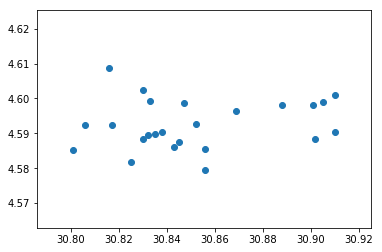

In [8]:
plt.scatter(x,y)

In [9]:
X = x.reshape(len(x), 1)
regr.fit(X,y)
Y = regr.predict(X)

In [10]:
regr.predict([[32]])  ##當美金兌台幣32塊時，人銀幣4.636元

array([ 4.63665517])

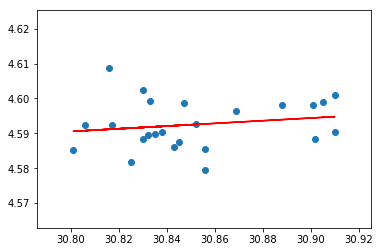

In [11]:
plt.scatter(x, y)
plt.plot(x, Y, 'r' )  ##有緩慢的正相關

In [12]:
df.美元新台幣.corr(df.人民幣新台幣)

0.18388696011351921

#### 利用多項式分析

In [13]:
X_poly = np.array([[k, k**2,k**3, k**4, k**5, k**6] for k in x])

In [14]:
regr_2=LinearRegression()
regr_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Y_poly=regr_2.predict(X_poly)

In [16]:
regr.predict([[32]])

array([ 4.63665517])

In [17]:
print(Y_poly)

[ 4.59345385  4.58924052  4.58863398  4.59013888  4.5974898   4.59407279
  4.59670874  4.59407279  4.59763667  4.59606501  4.59291217  4.59125182
  4.59263465  4.59535453  4.59190509  4.59345385  4.59207484  4.58848426
  4.58848426  4.5946326   4.58750102  4.59001681  4.59540889  4.58960101]


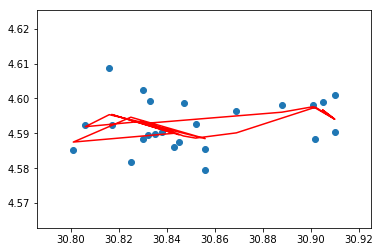

In [18]:
plt.scatter(x, y)
plt.plot(x, Y_poly, 'r')